# COMP3217 Coursework 2

## Import necessary libraries

Import necessary libraries
We will be using pandas for data manipulation, numpy for mathematical operations, matplotlib for plotting, sklearn for machine learning, and random for shuffling data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.pipeline import Pipeline
import random


## Task A

### Part 1: Data preprocessing
We will load the data, split it into features and labels, and shuffle it to ensure randomness

In [2]:
# Load the data
df_train = pd.read_csv('TrainingDataBinary.csv', header=None)
df_test = pd.read_csv('TestingDataBinary.csv', header=None)


In [3]:
# Split the data into features and labels
train_data = df_train.values 
random.shuffle(train_data) 
features = train_data[:,0:-1] 
labels = train_data[:,-1] 
test_data = df_test.values
features_test = test_data 


In [4]:
# Split the data into a training set and a testing set
features_train, features_valid, labels_train, labels_valid = train_test_split(features, labels, test_size=0.2, random_state=50)


### Part 2: Model creation and parameter optimization
We will create a pipeline that includes PCA and a random forest classifier, and use GridSearchCV to find the best parameters for the random forest


In [5]:
# Create a pipeline with PCA and a random forest classifier
pipeline = Pipeline([('pca', PCA(n_components=30, random_state=42)),
                     ('rf', RandomForestClassifier(random_state=42))])


In [6]:
# Define the parameter grid for the random forest
param_grid_rf = {
    'rf__n_estimators': [500, 1000, 1500],
    'rf__min_samples_leaf': [1, 2, 3],
}


In [7]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search.fit(features_train, labels_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=30, random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__min_samples_leaf': [1, 2, 3],
                         'rf__n_estimators': [500, 1000, 1500]})

In [8]:
# Print the best parameters
print("Best parameters: {}".format(grid_search.best_params_))


Best parameters: {'rf__min_samples_leaf': 1, 'rf__n_estimators': 1000}


### Part 3: Model evaluation
We will evaluate the model on the validation set and print the scores


In [9]:
# Print the score of the best model on the validation set
print("Validation set score: {:.2f}".format(grid_search.score(features_valid, labels_valid)))


Validation set score: 0.99


In [10]:
# Make predictions on the validation set and calculate the precision, recall, f1-score, and accuracy
labels_pred = grid_search.predict(features_valid)
print ("Precision: {:.2f}".format(precision_score(labels_valid, labels_pred, average='macro')))
print ("Recall: {:.2f}".format(recall_score(labels_valid, labels_pred, average='macro')))
print ("F1-Score: {:.2f}".format(f1_score(labels_valid, labels_pred, average='macro')))
print ("Accuracy: {:.2f}".format(accuracy_score(labels_valid, labels_pred)))


Precision: 0.99
Recall: 0.99
F1-Score: 0.99
Accuracy: 0.99


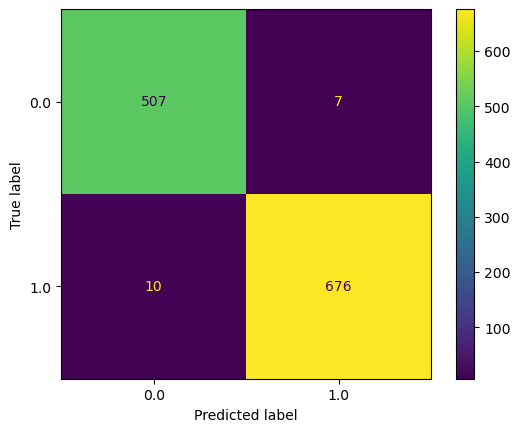

In [11]:
# Plot the confusion matrix
cm = confusion_matrix(labels_valid, labels_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()
plt.show()


### Part 4: Predictions and result saving
We will use the best model to make predictions on the test set, add the predictions to the test data, and save the data as a csv file


In [12]:
# Make predictions on the test set
test_predictions = grid_search.predict(features_test)
test_predictions


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [13]:
# Add the predictions to the test data
df_test['128'] = test_predictions


In [14]:
# Save the test data with the predictions as a csv file
df_test.to_csv(r"./TestingResultsBinary.csv",index=False,header=False)


## Task B

### Part 1: Data preprocessing
We will load the data, split it into features and labels, and shuffle it to ensure randomness

In [15]:
# Load the data
data_train_multi = pd.read_csv('TrainingDataMulti.csv', header=None)
data_test_multi = pd.read_csv('TestingDataMulti.csv', header=None)


In [16]:
# Shuffle and split the data into features and labels
train_data_multi = data_train_multi.values
random.shuffle(train_data_multi)
X_train_multi = train_data_multi[:, 0:-1]
y_train_multi = train_data_multi[:, -1]
test_data_multi = data_test_multi.values
x_test_multi = test_data_multi


In [17]:
# Split the data into a training set and a validation set
X_train_multi, X_valid_multi, y_train_multi, y_valid_multi = train_test_split(X_train_multi, y_train_multi, test_size=0.2, random_state=50)


### Part 2: Model creation and parameter optimization
We create a random forest classifier and use GridSearchCV to find the best parameters

In [18]:
# Define the random forest classifier and the parameter grid
rf_multi = RandomForestClassifier(random_state=42)
param_grid_rf_multi = {'n_estimators': [500, 1000, 1500], 'min_samples_leaf': [1, 2, 3]}


In [19]:
# Use GridSearchCV to find the best parameters
grid_search_multi = GridSearchCV(rf_multi, param_grid=param_grid_rf_multi, cv=5, n_jobs=-1)
grid_search_multi.fit(X_train_multi, y_train_multi)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [500, 1000, 1500]})

In [20]:
# Print the best parameters
print("Best parameters: {}".format(grid_search_multi.best_params_))


Best parameters: {'min_samples_leaf': 1, 'n_estimators': 1000}


### Part 3: Model evaluation
We evaluate the model on the validation set and print the scores

In [21]:
# Print the score of the best model on the validation set
print("Validation set score: {:.2f}".format(grid_search_multi.score(X_valid_multi, y_valid_multi)))


Validation set score: 0.97


In [22]:
# Make predictions on the validation set and calculate the precision, recall, f1-score, and accuracy
predictions_multi = grid_search_multi.predict(X_valid_multi)
print ("Precision: {:.2f}".format(precision_score(y_valid_multi, predictions_multi, average='macro')))
print ("Recall: {:.2f}".format(recall_score(y_valid_multi, predictions_multi, average='macro')))
print ("F1-Score: {:.2f}".format(f1_score(y_valid_multi, predictions_multi, average='macro')))
print ("Accuracy: {:.2f}".format(accuracy_score(y_valid_multi, predictions_multi)))


Precision: 0.98
Recall: 0.97
F1-Score: 0.97
Accuracy: 0.97


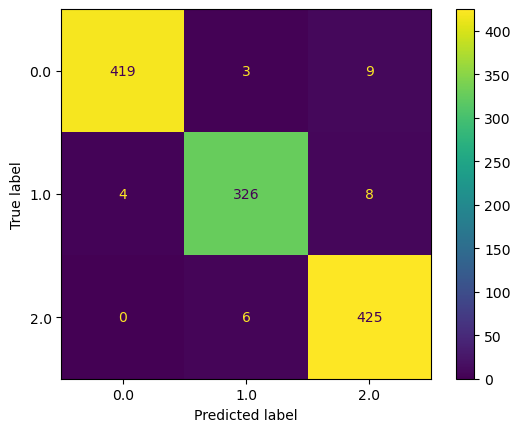

In [23]:
# Show the confusion matrix
cm_multi = confusion_matrix(y_valid_multi, predictions_multi, labels=grid_search_multi.classes_)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=grid_search_multi.classes_)
disp_multi.plot()
plt.show()


### Part 4: Predictions and result saving
We will use the best model to make predictions on the test set, add the predictions to the test data, and save the data as a csv file

In [24]:
# Make predictions on the test set
test_predictions_multi = grid_search_multi.predict(x_test_multi)
test_predictions_multi

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
# Add the predictions to the test data
data_test_multi['128'] = test_predictions_multi

In [26]:
# Save the test data with the predictions as a csv file
data_test_multi.to_csv(r"./TestingResultsMulti.csv",index=False,header=False)